In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import collections

%matplotlib inline

#### Bring in the county level species data

In [63]:
spec = pd.read_csv('../data/rare_species_by_county.csv')

In [64]:
spec.head()

,County,Type,Category,Scientific Name,Common Name,Global Rank,State Rank,Fed. Status,State Status,Habitat,Wet Habitat Flag
0,Anderson,Invertebrate Animal,Arachnid,Hesperochernes mirabilis,Southeastern Cave Pseudoscorpion,G5,S3,--,"Rare, Not State Listed",Terrestrial cave obligate; woodrat debris in c...,Upland
1,Anderson,Invertebrate Animal,Mollusc,Cyprogenia stegaria,Fanshell,G1,S1,"LE, XN",E,Medium to large streams and rivers with coarse...,Aquatic
2,Anderson,Vertebrate Animal,Bird,Limnothlypis swainsonii,Swainson's Warbler,G4,S3,--,D,"Mature, rich, damp, deciduous floodplain and s...",Possible
3,Anderson,Vertebrate Animal,Reptile,Ophisaurus attenuatus longicaudus,Eastern Slender Glass Lizard,G5T5,S3,--,D,"Dry upland areas including brushy, cut-over wo...",Upland
4,Anderson,Vertebrate Animal,Bird,Vermivora chrysoptera,Golden-winged Warbler,G4,S3B,--,T,Early successional habitats in foothill region...,Upland


##### Rename columns with no spaces, create a column that makes it easy to sum instances, "summer" and group by County

In [65]:
spec.columns = ['County', 'Type', 'Category', 'Scientific_Name', 'Common_Name', 
               'Global_Rank', 'State_Rank', 'Fed_Status', 'State_Status', 'Habitat', 'Wet_Habitat_Flag']

##### Join the geometry from original counties file

#### How many of each of the ranks are we seeing in the whole state?

First, global rank:

In [66]:
spec.Global_Rank

0          G5
1          G1
2          G4
3        G5T5
4          G4
        ...  
4422      G3Q
4423       G5
4424    G5T4?
4425       G5
4426       G1
Name: Global_Rank, Length: 4427, dtype: object

In [67]:
gtype_list = spec.Global_Rank.tolist()

In [68]:
type(gtype_list)

list

In [69]:
collections.Counter(gtype_list)

Counter({'G5': 1098,
         'G1': 433,
         'G4': 602,
         'G5T5': 56,
         'G1G2': 133,
         'G3': 697,
         'G3G4': 297,
         'GNR': 71,
         'G2G3': 253,
         'G4T4': 34,
         'G3G5': 17,
         'G4?T4Q': 11,
         'G2': 267,
         'G3?': 22,
         'G4G5': 138,
         'G3G4T3': 14,
         'G2?': 18,
         'G2Q': 15,
         'G3QT3Q': 17,
         'G5T3Q': 13,
         'G5T4?': 8,
         'G4?': 41,
         'G5T4Q': 5,
         'G5?': 24,
         'G1G2Q': 8,
         'GNRT1': 1,
         'G5T2': 8,
         'G3T2T3': 4,
         'G5T3?': 5,
         'G2G4': 10,
         'G3Q': 8,
         'G1Q': 11,
         'G4G5T4T5': 7,
         'GH': 3,
         'G5T4T5': 5,
         'G3G4T2': 4,
         'G5T3': 4,
         'G4?Q': 7,
         'GU': 2,
         'G4G5T4': 3,
         'G5?T3': 3,
         'G4T2': 3,
         'G2G3Q': 8,
         'G4G5T4?': 7,
         'G4G5T3': 4,
         'G4T3Q': 5,
         'G5T3T5': 1,
         'G3G4

In [70]:
gtype_dict = collections.Counter(gtype_list)

In [71]:
gtype_df = pd.DataFrame.from_dict(gtype_dict, orient = 'index', columns = ['count'])

In [72]:
gtype_df = gtype_df.sort_values(['count'], ascending = False).reset_index()

In [73]:
gtype_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   58 non-null     object
 1   count   58 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ KB


In [74]:
gtype_df = gtype_df.head(9)

In [75]:
gtype_df = gtype_df.sort_values(['count'])

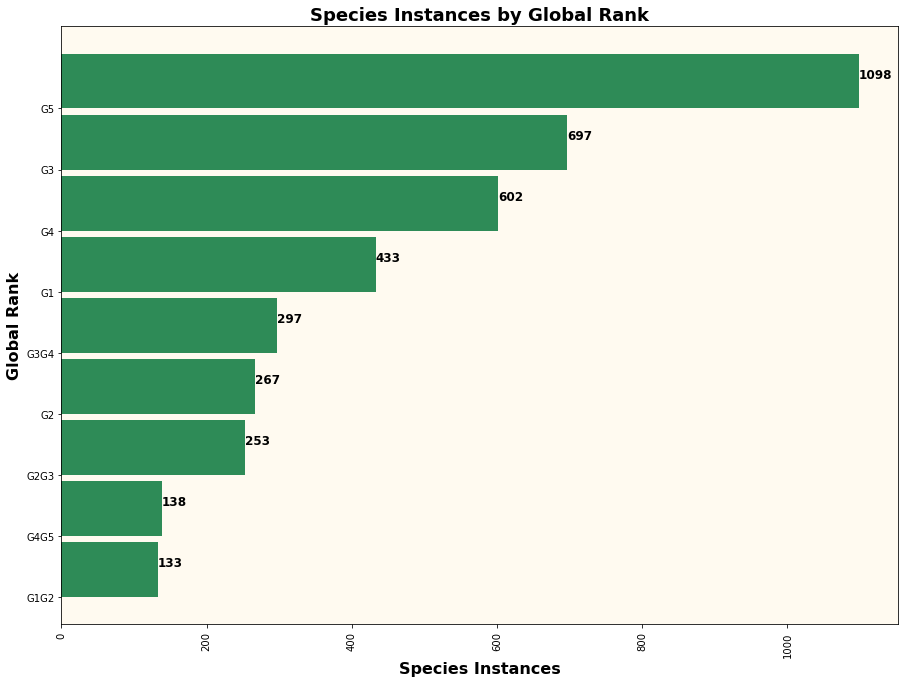

In [76]:
#plot:

plt.figure(figsize = (15, 11))
plt.rcParams['axes.facecolor'] = 'floralwhite'
plt.barh('index', 'count', data = gtype_df, color = 'seagreen', align = 'edge', height = 0.9)
plt.xlabel('Species Instances', fontweight = 'bold', fontsize = 16, color = 'black')
plt.ylabel('Global Rank', fontweight = 'bold', fontsize = 16, color = 'black')
plt.title('Species Instances by Global Rank', fontweight = 'bold', fontsize = 18, color = 'black')
plt.xticks(rotation = 90, color = 'black')
plt.yticks(color = 'black')

for i in plt.barh('index', 'count', data = gtype_df, color = 'seagreen', align = 'edge', height = 0.9):  
    plt.text(i.get_width()-0.0001*i.get_width(), i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 12, fontweight = 'bold',
             color ='black');

Next, State rank:

In [77]:
stype_list = spec.State_Rank.tolist()

In [78]:
stype_dict = collections.Counter(stype_list)

In [79]:
stype_df = pd.DataFrame.from_dict(stype_dict, orient = 'index', columns = ['count'])

In [80]:
stype_df = stype_df.sort_values(['count'], ascending = False).reset_index(inplace = False)

In [81]:
stype_df = stype_df.sort_values(['count'], ascending = False).reset_index(inplace = False)

In [82]:
stype_df

,level_0,index,count
0,0,S1,1401
1,1,S2,1208
2,2,S3,777
3,3,S2S3,350
4,4,S1S2,337
5,5,S3S4,85
6,6,SNR,73
7,7,S3B,37
8,8,S4,37
9,9,S2?,27


In [83]:
stype_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   level_0  23 non-null     int64 
 1   index    23 non-null     object
 2   count    23 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 680.0+ bytes


In [84]:
stype_df = stype_df[(stype_df['level_0'].isin([0, 1, 2, 8, 4, 3, 5]))]

In [85]:
stype_df = stype_df.sort_values(['count'])

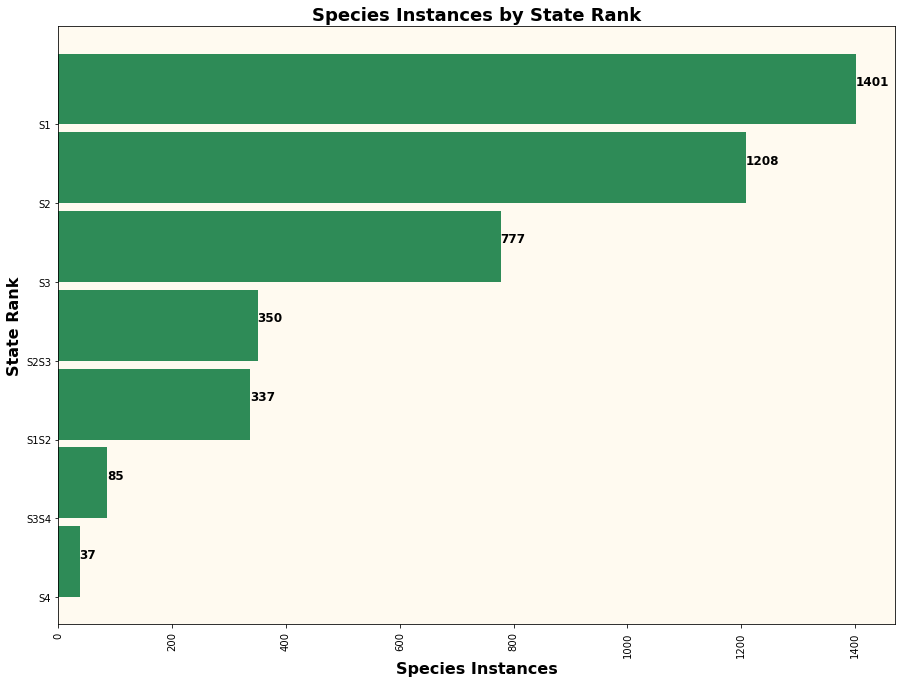

In [86]:
#plot:

plt.figure(figsize = (15, 11))
plt.rcParams['axes.facecolor'] = 'floralwhite'
plt.barh('index', 'count', data = stype_df, color = 'seagreen', align = 'edge', height = 0.9)
plt.xlabel('Species Instances', fontweight = 'bold', fontsize = 16, color = 'black')
plt.ylabel('State Rank', fontweight = 'bold', fontsize = 16, color = 'black')
plt.title('Species Instances by State Rank', fontweight = 'bold', fontsize = 18, color = 'black')
plt.xticks(rotation = 90, color = 'black')
plt.yticks(color = 'black')

for i in plt.barh('index', 'count', data = stype_df, color = 'seagreen', align = 'edge', height = 0.9):  
    plt.text(i.get_width()-0.0001*i.get_width(), i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 12, fontweight = 'bold',
             color ='black');

Same process but with Federal Status:

In [87]:
fstat_list = spec.Fed_Status.tolist()

In [88]:
fstat_dict = collections.Counter(fstat_list)

In [89]:
fstat_df = pd.DataFrame.from_dict(fstat_dict, orient = 'index', columns = ['count'])

In [90]:
fstat_df = fstat_df.sort_values(['count']).reset_index(inplace = False)

In [91]:
fstat_df = fstat_df.sort_values(['count']).reset_index(inplace = False)

In [92]:
fstat_df

,level_0,index,count
0,0,SC,1
1,1,SAT,2
2,2,C,4
3,3,"LT, XN",6
4,4,"LT,XN",20
5,5,"LE,XN",20
6,6,DM,21
7,7,No Status,48
8,8,LT,113
9,9,"LE, XN",170


In [93]:
fstat_df = fstat_df[(fstat_df['level_0'].isin([8, 10]))]

In [94]:
fstat_df

,level_0,index,count
8,8,LT,113
10,10,LE,339


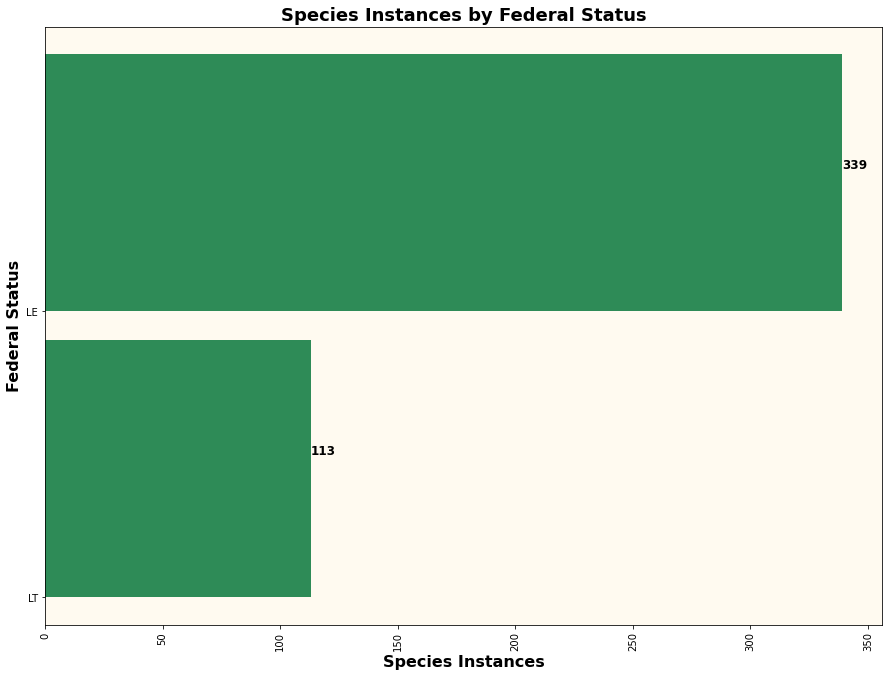

In [95]:
#plot:

plt.figure(figsize = (15, 11))
plt.rcParams['axes.facecolor'] = 'floralwhite'
plt.barh('index', 'count', data = fstat_df, color = 'seagreen', align = 'edge', height = 0.9)
plt.xlabel('Species Instances', fontweight = 'bold', fontsize = 16, color = 'black')
plt.ylabel('Federal Status', fontweight = 'bold', fontsize = 16, color = 'black')
plt.title('Species Instances by Federal Status', fontweight = 'bold', fontsize = 18, color = 'black')
plt.xticks(rotation = 90, color = 'black')
plt.yticks(color = 'black')

for i in plt.barh('index', 'count', data = fstat_df, color = 'seagreen', align = 'edge', height = 0.9):  
    plt.text(i.get_width()-0.0001*i.get_width(), i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 12, fontweight = 'bold',
             color ='black');

Next: Type

In [96]:
type_list = spec.Type.tolist()

In [97]:
type_dict = collections.Counter(type_list)

In [98]:
type_df = pd.DataFrame.from_dict(type_dict, orient = 'index', columns = ['count'])

In [99]:
type_df = type_df.sort_values(['count']).reset_index(inplace = False)

In [100]:
type_df = type_df.sort_values(['count']).reset_index(inplace = False)

In [101]:
type_df

,level_0,index,count
0,0,Fungus,4
1,1,International Terrestrial Ecological System Cl...,31
2,2,Animal Assemblage,42
3,3,International Vegetation Classification - Natural,43
4,4,Nonvascular Plant,121
5,5,Invertebrate Animal,984
6,6,Vertebrate Animal,1241
7,7,Vascular Plant,1961


In [102]:
type_df = type_df[(type_df['level_0'].isin([0, 2, 4, 5, 6, 7]))]

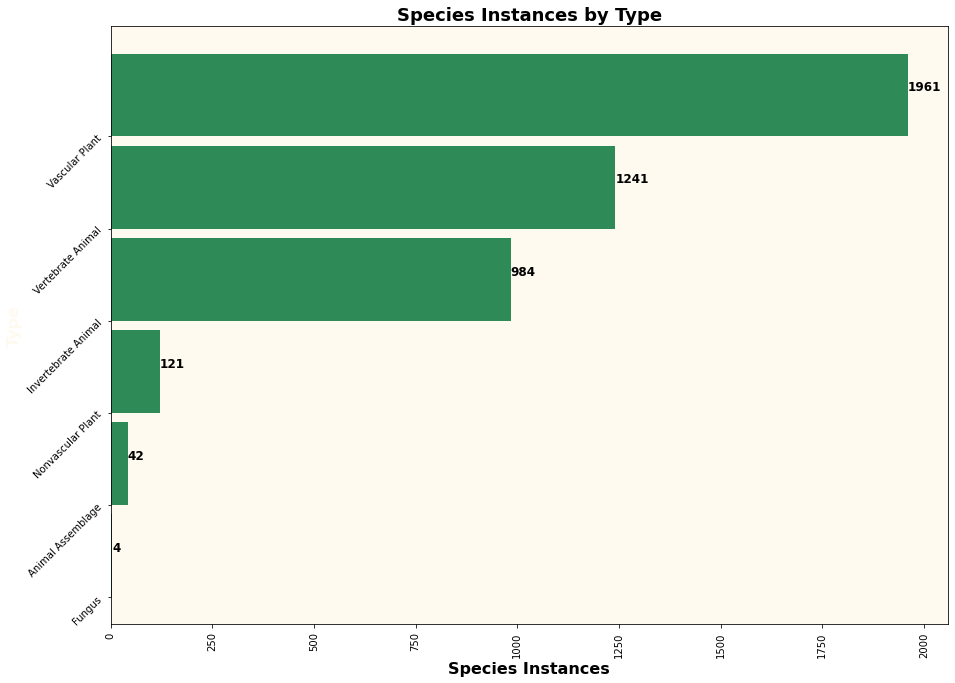

In [103]:
#plot:

plt.figure(figsize = (15, 11))
plt.rcParams['axes.facecolor'] = 'floralwhite'
plt.barh('index', 'count', data = type_df, color = 'seagreen', align = 'edge', height = 0.9)
plt.xlabel('Species Instances', fontweight = 'bold', fontsize = 16, color = 'black')
plt.ylabel('Type', fontweight = 'bold', fontsize = 16, color = 'floralwhite')
plt.title('Species Instances by Type', fontweight = 'bold', fontsize = 18, color = 'black')
plt.xticks(rotation = 90, color = 'black')
plt.yticks(rotation = 45, color = 'black')

for i in plt.barh('index', 'count', data = type_df, color = 'seagreen', align = 'edge', height = 0.9):  
    plt.text(i.get_width()-0.0001*i.get_width(), i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 12, fontweight = 'bold',
             color ='black');

Now with Category:

In [104]:
cat_list = spec.Category.tolist()

In [105]:
cat_dict = collections.Counter(cat_list)

In [106]:
cat_df = pd.DataFrame.from_dict(cat_dict, orient = 'index', columns = ['count'])

In [107]:
cat_df = cat_df.sort_values(['count']).reset_index(inplace = False)

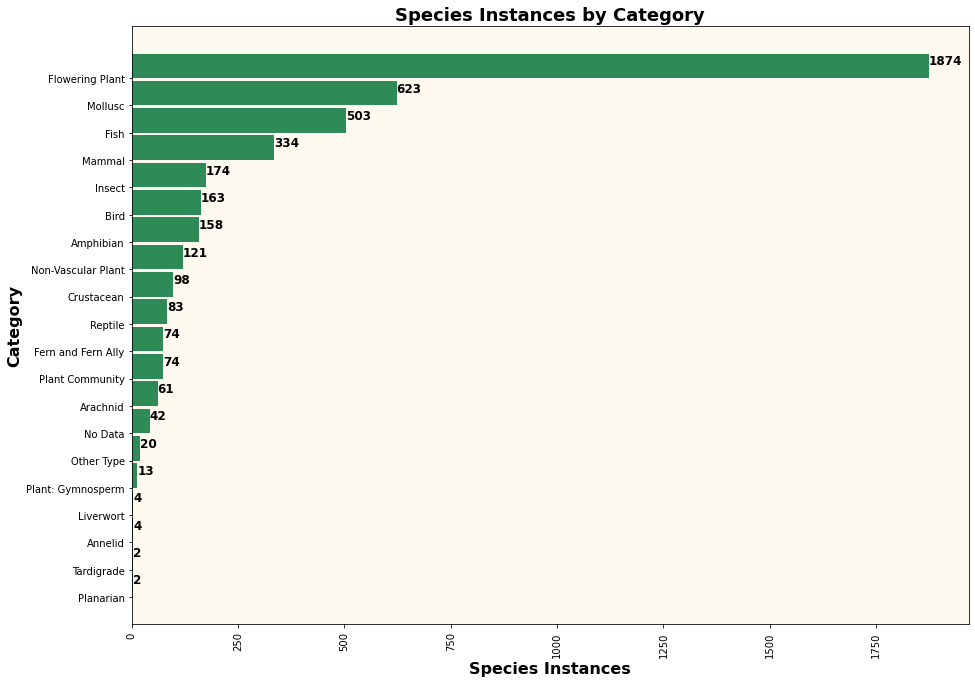

In [108]:
#plot:

plt.figure(figsize = (15, 11))
plt.rcParams['axes.facecolor'] = 'floralwhite'
plt.barh('index', 'count', data = cat_df, color = 'seagreen', align = 'edge', height = 0.9)
plt.xlabel('Species Instances', fontweight = 'bold', fontsize = 16, color = 'black')
plt.ylabel('Category', fontweight = 'bold', fontsize = 16, color = 'black')
plt.title('Species Instances by Category', fontweight = 'bold', fontsize = 18, color = 'black')
plt.xticks(rotation = 90, color = 'black')
plt.yticks(color = 'black')

for i in plt.barh('index', 'count', data = cat_df, color = 'seagreen', align = 'edge', height = 0.9):  
    plt.text(i.get_width()-0.0001*i.get_width(), i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 12, fontweight = 'bold',
             color ='black');

Now, habitat types:

In [109]:
hab_list = spec.Wet_Habitat_Flag.tolist()

In [110]:
hab_dict = collections.Counter(hab_list)

In [111]:
hab_df = pd.DataFrame.from_dict(hab_dict, orient = 'index', columns = ['count'])

In [112]:
hab_df = hab_df.sort_values(['count']).reset_index(inplace = False)

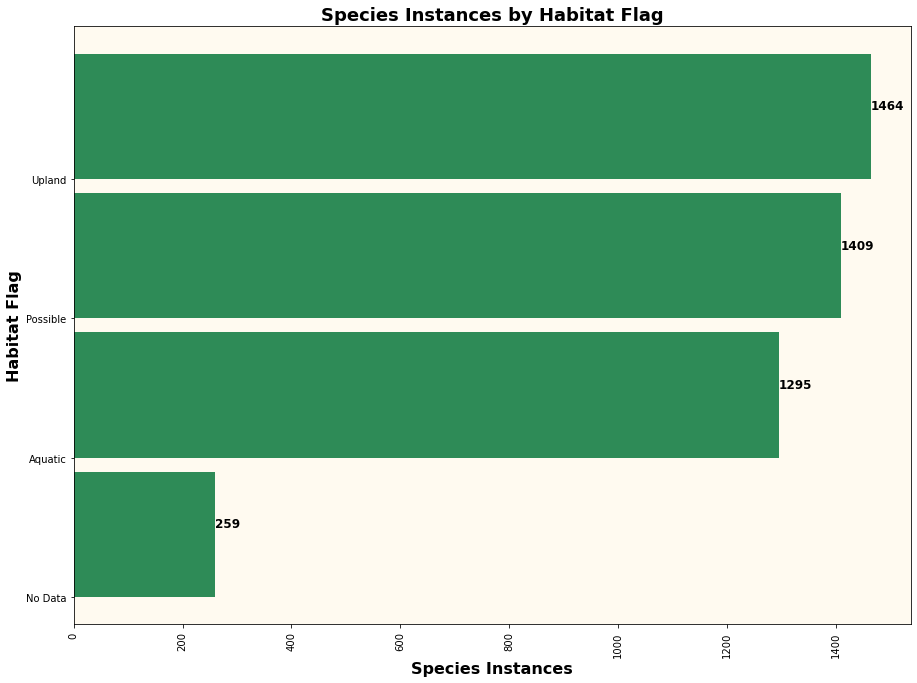

In [113]:
#plot:

plt.figure(figsize = (15, 11))
plt.rcParams['axes.facecolor'] = 'floralwhite'
plt.barh('index', 'count', data = hab_df, color = 'seagreen', align = 'edge', height = 0.9)
plt.xlabel('Species Instances', fontweight = 'bold', fontsize = 16, color = 'black')
plt.ylabel('Habitat Flag', fontweight = 'bold', fontsize = 16, color = 'black')
plt.title('Species Instances by Habitat Flag', fontweight = 'bold', fontsize = 18, color = 'black')
plt.xticks(rotation = 90, color = 'black')
plt.yticks(color = 'black')

for i in plt.barh('index', 'count', data = hab_df, color = 'seagreen', align = 'edge', height = 0.9):  
    plt.text(i.get_width()-0.0001*i.get_width(), i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 12, fontweight = 'bold',
             color ='black');